# Excavator use-case 6: cost optimization

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 50 elapsed time:0.007s
	Checking better value < 50
	Found value: 35 elapsed time:0.021s
	Checking better value < 35
	Can't find a better solution for problem Excavator6:CostOptimization.

	Found optimum 35. Stopping iteration.
	total number of iterations: 3
	value: 35
	Excavator6:CostOptimization satisfiability checked in 0.02s


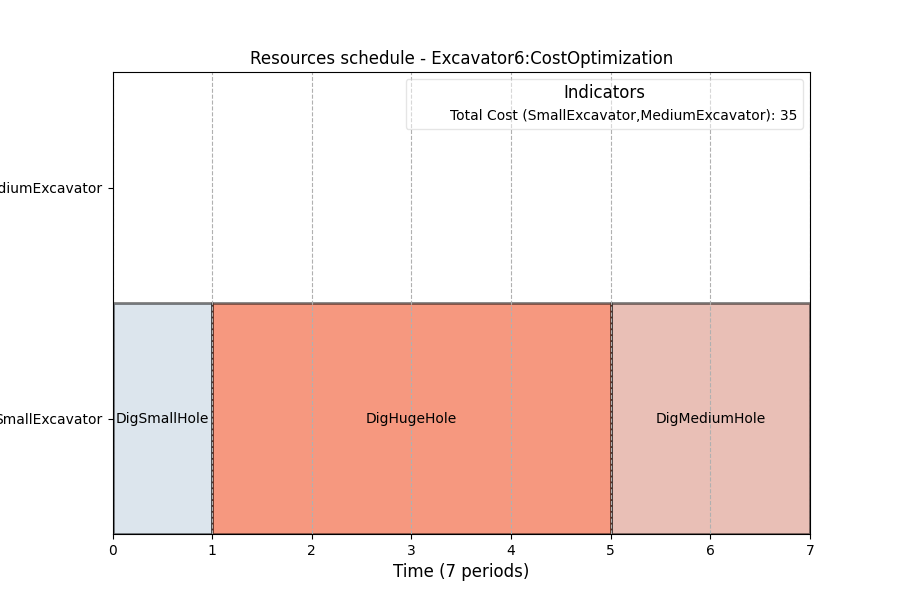

In [1]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem('Excavator6:CostOptimization')

# three tasks
dig_small_hole = ps.VariableDurationTask('DigSmallHole', work_amount=3)
dig_medium_hole = ps.VariableDurationTask('DigMediumHole', work_amount=7)
dig_huge_hole = ps.VariableDurationTask('DigHugeHole', work_amount=15)

# two workers
small_exc = ps.Worker('SmallExcavator', productivity=4, cost=ps.ConstantCostPerPeriod(5))
medium_ex = ps.Worker('MediumExcavator', productivity=6, cost=ps.ConstantCostPerPeriod(10))

dig_small_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_medium_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_huge_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))


# minimize the global cost
problem.add_objective_resource_cost([small_exc, medium_ex])

solver = ps.SchedulingSolver(problem)
solution = solver.solve()
solution.render_gantt_matplotlib()
